<a href="https://colab.research.google.com/github/yunusemravci/learning_AI/blob/main/shortest_path.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkX

In [ ]:
import networkx as nx
from sys import maxsize
import matplotlib.pyplot as plt

# Create a directed graph
# Add more edges as needed

# If you have a list of nodes or edges, you can also add them using add_nodes_from and add_edges_from methods.

# Now, you have a networkx graph G with nodes and links added, and you can perform various graph operations on G.

class SimpleDequePy:
    """ Special implementation of deque using fix-length array

    the interface utilized for shortest-path algorithms is exactly the same as
    the built-in deque.
    """
    def __init__(self, size_):
        self.nodes = [-1] * size_
        self.head = -1
        self.tail = -1

    def __len__(self):
        return self.head != -1

    def appendleft(self, nodeID):
        self.nodes[nodeID] = self.head
        self.head = nodeID
        if self.head == -1:
            self.tail = nodeID

    def append(self, nodeID):
        if self.head == -1:
            self.head = nodeID
            self.tail = nodeID
            self.nodes[nodeID] = -1
        else:
            self.nodes[self.tail] = nodeID
            self.nodes[nodeID] = -1
            self.tail = nodeID

    def popleft(self):
        left = self.head
        self.head = self.nodes[left]
        self.nodes[left] = -1
        return left

    def clear(self):
        self.head = -1
        self.tail = -1
def show_wgraph(custom_node_positions=None):
    plt.figure()

    if custom_node_positions==None:
        pos = nx.spring_layout(G)
    else:
        pos=custom_node_positions

    weight_labels = nx.get_edge_attributes(G,'weight')
    nx.draw(G,pos,font_color = 'white', node_shape = 's', with_labels = True,)
    output = nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels)

def CalculateSSSPFIFOI(srcNodeID, dist, pred, G):
    """ FIFO implementation of MLC using built-in list and x in s operation

    The time complexity of x in s operation for built-in list is O(n), where n
    is the size of list at run time.
    """
    # Lists to store history of pred and dist tables
    pred_history = [pred.copy()]
    dist_history = [dist.copy()]
    dist[srcNodeID] = 0
    # list
    selist = []
    selist.append(srcNodeID)
    # label correcting
    while selist:
        i = selist.pop(0)
        print(f"\nEvaluating node: {i}")
        # Accessing outgoing edges and their attributes from the networkx graph G
        for neighbor in G.neighbors(i):
            link_length = G[i][neighbor].get('weight', 1)  # Assuming a default length of 1 if not specified
            j = neighbor
            print(f"Checking edge ({i}, {j}) with cost c_ij = {link_length}")
            print(f"Current d({i}): {dist[i]}, d({j}): {dist[j]}")

            if dist[j] > dist[i] + link_length:
                dist[j] = dist[i] + link_length
                pred[j] = i
                print(f"Updating d({j}) to {dist[j]} and pred({j}) to {i}")

                if j not in selist:
                    selist.append(j)
            else:
              print(f"No update for d({j}) and pred({j})")
          # Add the current state of pred and dist to their histories
        pred_history.append(pred.copy())
        dist_history.append(dist.copy())
    # Printing the tables
    print("\nHome Tree/Predecessor Table:")
    print("-" * 50)
    for step, table in enumerate(pred_history):
        print(f"Step {step}: {table}")

    print("\nDistance/Cost Table:")
    print("-" * 50)
    for step, table in enumerate(dist_history):
        print(f"Step {step}: {table}")

def extract_path(pred, source, target):
    """Extracts a path from source to target using a predecessor dictionary."""
    if pred[target] is None:
        return []  # No path found

    path = [target]
    while target != source:
        target = pred[target]
        path.append(target)
    path.reverse()
    return path


Evaluating node: 1
Checking edge (1, 2) with cost c_ij = 6
Current d(1): 0, d(2): inf
Updating d(2) to 6 and pred(2) to 1
Checking edge (1, 3) with cost c_ij = 4
Current d(1): 0, d(3): inf
Updating d(3) to 4 and pred(3) to 1

Evaluating node: 2
Checking edge (2, 5) with cost c_ij = 2
Current d(2): 6, d(5): inf
Updating d(5) to 8 and pred(5) to 2
Checking edge (2, 3) with cost c_ij = 2
Current d(2): 6, d(3): 4
No update for d(3) and pred(3)

Evaluating node: 3
Checking edge (3, 4) with cost c_ij = 2
Current d(3): 4, d(4): inf
Updating d(4) to 6 and pred(4) to 3
Checking edge (3, 5) with cost c_ij = 1
Current d(3): 4, d(5): 8
Updating d(5) to 5 and pred(5) to 3

Evaluating node: 5
Checking edge (5, 6) with cost c_ij = 7
Current d(5): 5, d(6): inf
Updating d(6) to 12 and pred(6) to 5

Evaluating node: 4
Checking edge (4, 5) with cost c_ij = 1
Current d(4): 6, d(5): 5
No update for d(5) and pred(5)
Checking edge (4, 6) with cost c_ij = 3
Current d(4): 6, d(6): 12
Updating d(6) to 9 and pr

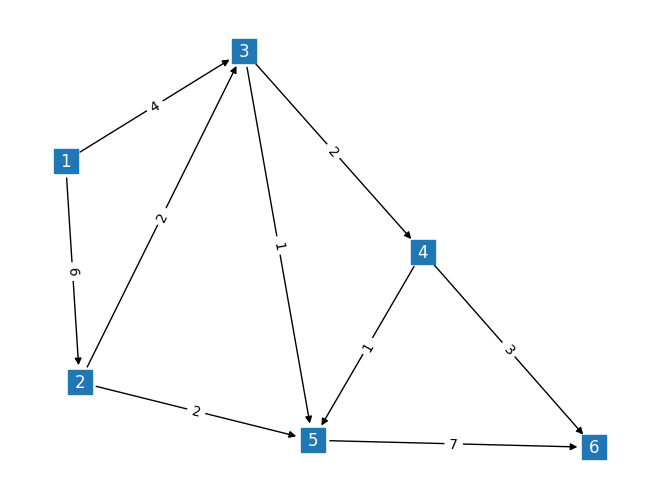

In [ ]:
# Example usage:
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(range(1,7))

# Add edges to G as needed
G.add_edges_from([(1, 2, {"weight": 6}), (1, 3, {"weight": 4}), (2, 5, {"weight": 2}), (3, 4, {"weight": 2}), (3, 5, {"weight": 1}),
 (4, 5, {"weight": 1}), (4, 6, {"weight": 3}), (5, 6, {"weight": 7}), (2, 3, {"weight": 2})
])

show_wgraph()

# Initialize dist and pred dictionaries with node IDs as keys
node_ids = list(G.nodes)

dist = {node_id: float('inf') for node_id in node_ids}
pred = {node_id: None for node_id in node_ids}

# Call the function with source node ID, dist, pred, and the graph G
srcNodeID = 1  # Replace with the actual source node ID
CalculateSSSPFIFOI(srcNodeID, dist, pred, G)

print(dist)  # Display distances
print(pred)  # Display predecessors

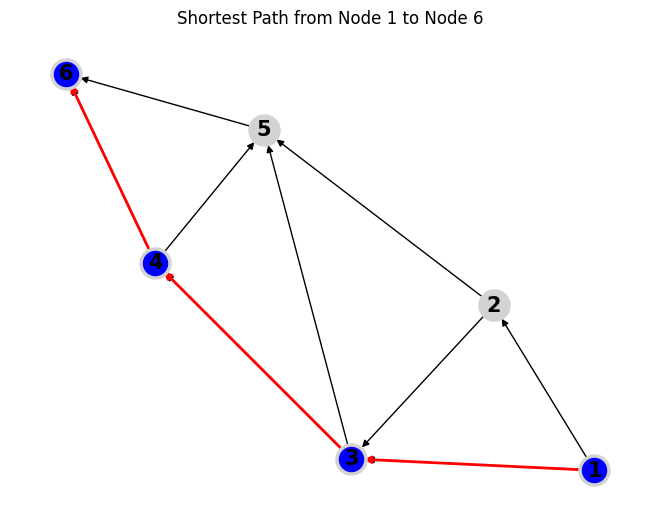

In [ ]:
# Extract the shortest path from node 1 to node 6
path = extract_path(pred, 1, 6)

# Visualization
pos = nx.spring_layout(G)  # Use spring layout for position

# Draw the graph with a gray color
nx.draw(G, pos, with_labels=True, node_color="lightgray", node_size=500, font_size=15, font_weight='bold')

# Highlight the shortest path with a dark color
path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color="blue")
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)

plt.title("Shortest Path from Node 1 to Node 6")
plt.show()